In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,class_sep=20,n_classes=2,
                             n_clusters_per_class=1,random_state=41, hypercube=False)

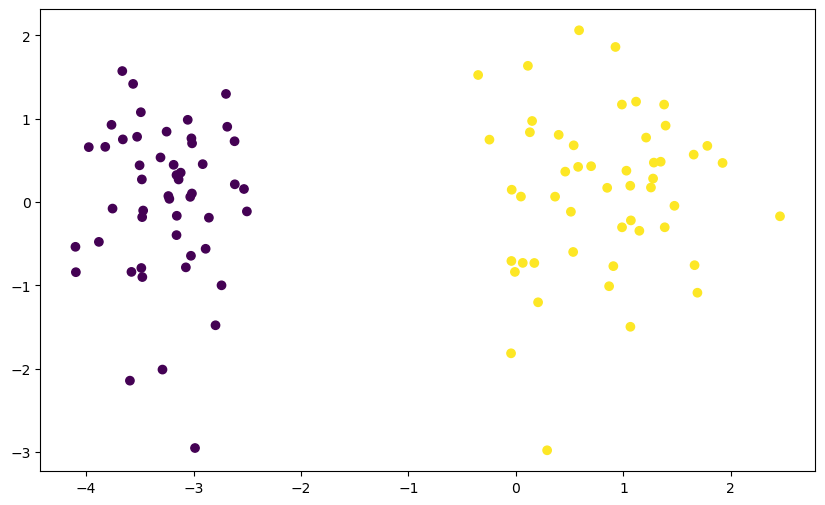

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=y, )
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
lg = LogisticRegression(penalty=None, solver='sag')

In [6]:
lg.fit(X,y)

C:\Users\M.Muzzamil\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [7]:
print('coef_ :', lg.coef_)
print('intercept_ :', lg.intercept_)

coef_ : [[4.79416461 0.20808348]]
intercept_ : [5.76589218]


In [8]:
m1 = -(lg.coef_[0][0]/lg.coef_[0][1])
b1 = -(lg.intercept_/lg.coef_[0][1])

In [9]:
x_input = np.linspace(-3,3,100)
y_input = m1 * x_input + b1

In [35]:
def lggd(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [36]:
def sigmoid(z):
    return (1/(1 + np.exp(-z)))

In [37]:
coef_ , intercept_ = lggd(X,y)

In [38]:
print('coef_ : ',coef_)
print('intercept_ : ',intercept_)

coef_ :  [4.83926872 0.21182255]
intercept_ :  5.833388649053249


In [39]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [40]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m * x_input1 + b

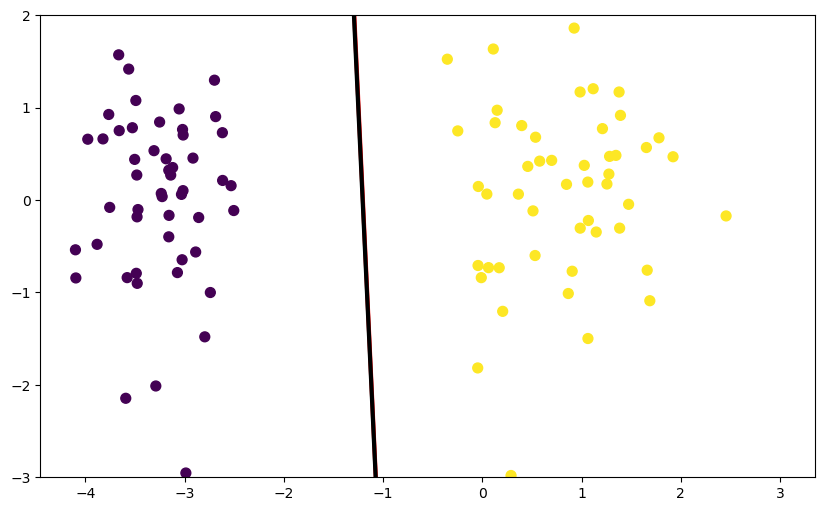

In [41]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input, color='red', linewidth=3)
plt.plot(x_input1,y_input1, color='black', linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y, s = 50)
plt.ylim(-3,2)
plt.show()